Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [582]:
NAME = "Nazar Yaremko"
COLLABORATORS = ""

---


# CS110 Spring 2020 - Assignment 2 (LBA)
# Task Scheduler for a Multi-Tasking Minervan - Part I

This is a Location-Based Assignment (LBA), in which you will build an automatic task scheduler for a day in the life of a Minervan in your current rotation city. You also need to apply the concepts of priority queues and heaps discussed in class in the context of a single day task scheduler. This assignment builds on the simple scheduler studied in lesson 4.1, “Heaps and priority queues”.  

You are now asked to create your own list of tasks, with their durations and task dependencies.  Your list of tasks must include activities that you plan to perform in a day in your rotation city. Include at least 3 activities that are culturally specific to your rotation city (e.g., if you're in Tokyo, you might be interested in enjoying the cherry (sakura) blossom season). 

Please note that the weight of the assignment is smaller than any other CS110 assignment, which should be understood in terms of time and effort management. Please plan accordingly.

### Improving The Simple Task Scheduler Studied in Lesson 4.1
Your task scheduler receives a list of tasks to be performed in a day.  The input list of tasks has the form:

<h5><center>Task_ID | Task Description | Task Duration | List of Task Dependencies | Task Status</center></h5>


* **Task ID**: Unique task identifier which other tasks may reference (to deal with task dependencies).

* **Task Description**. A short description of the task (e.g. ‘visit the Neues Museum’, ‘dine gogigui’, ‘get a Fahrkarten’, ‘go to an exhibition at the Dongdaemun Design Plaza”, etc). Why is this task particularly compelling?

* **Task Duration** in minutes. Duration of the task in minutes.

* **Dependencies.** This is a list of Task IDs indicating whether the current task cannot begin until all of its dependencies have been completed (e.g. one cannot eat gogigui unless one has already found a restaurant in Seoul, has arrived at a restaurant, has gotten a table, has ordered, etc.)

* **Status.** A task is one of these states: $NOT-YET-STARTED$, $IN-PROGRESS$, or $COMPLETED$.

With an input list of tasks as described above, your scheduler needs to use a priority queue, implemented with either a $MAXHEAP$ or a $MINHEAP$ depending on your implementation, to plan the execution of the tasks. Please note that for this assignment, you are expected to write your own heap/priority queue implementation (rather than using the heapq module we have used in class).

Your scheduler must keep a clock that gets incremented by a fixed time-step.  This clock is also kept in minutes.  Your scheduler needs to output a step-by-step execution of the input tasks and a report on the total amount of time required to execute all the tasks.

### Criteria for scheduling tasks.

Like in the example in class, we assume that all tasks have the same priority. Thus, your scheduler will begin scheduling tasks by first looking at which tasks are ready to be executed and added to the priority queue as soon as all their dependencies have been satisfied.

You may consider a different criterion for deciding which task is tackled first among tasks
that are ready to be executed (e.g., you may choose to consider first a task that has a large number of dependencies).


### Submission Materials.
Your assignment submission needs to include the following resources:
1. A PDF file must be the first resource and it will be created from the Jupyter notebook template provided in these instructions. Please make sure to use the same function names as the ones provided in the template. If your name is “Dumbledore”, your PDF should be named “Dumbledore.pdf”.
2. Your second resource must be a single Python/Jupyter Notebook named “Dumbledore.ipynb”. You can also submit a zip file that includes your Jupyter notebook, but please make sure to name it “Dumbledore.zip” (if your name is Dumbledore!).

## Part A [HCs #responsibility and #professionalism; appropriate CS110-LO]

Take a screenshot of your CS110 dashboard on Forum where the following is visible:
* your name.
* your absences for the course have been set to excused up to the end of week 5 (inclusively).

This will be evidence that you have submitted acceptable pre-class and make-up work
for a CS110 session you may have missed. Check the specific CS110 make-up and
pre-class policies in the syllabus of the course.



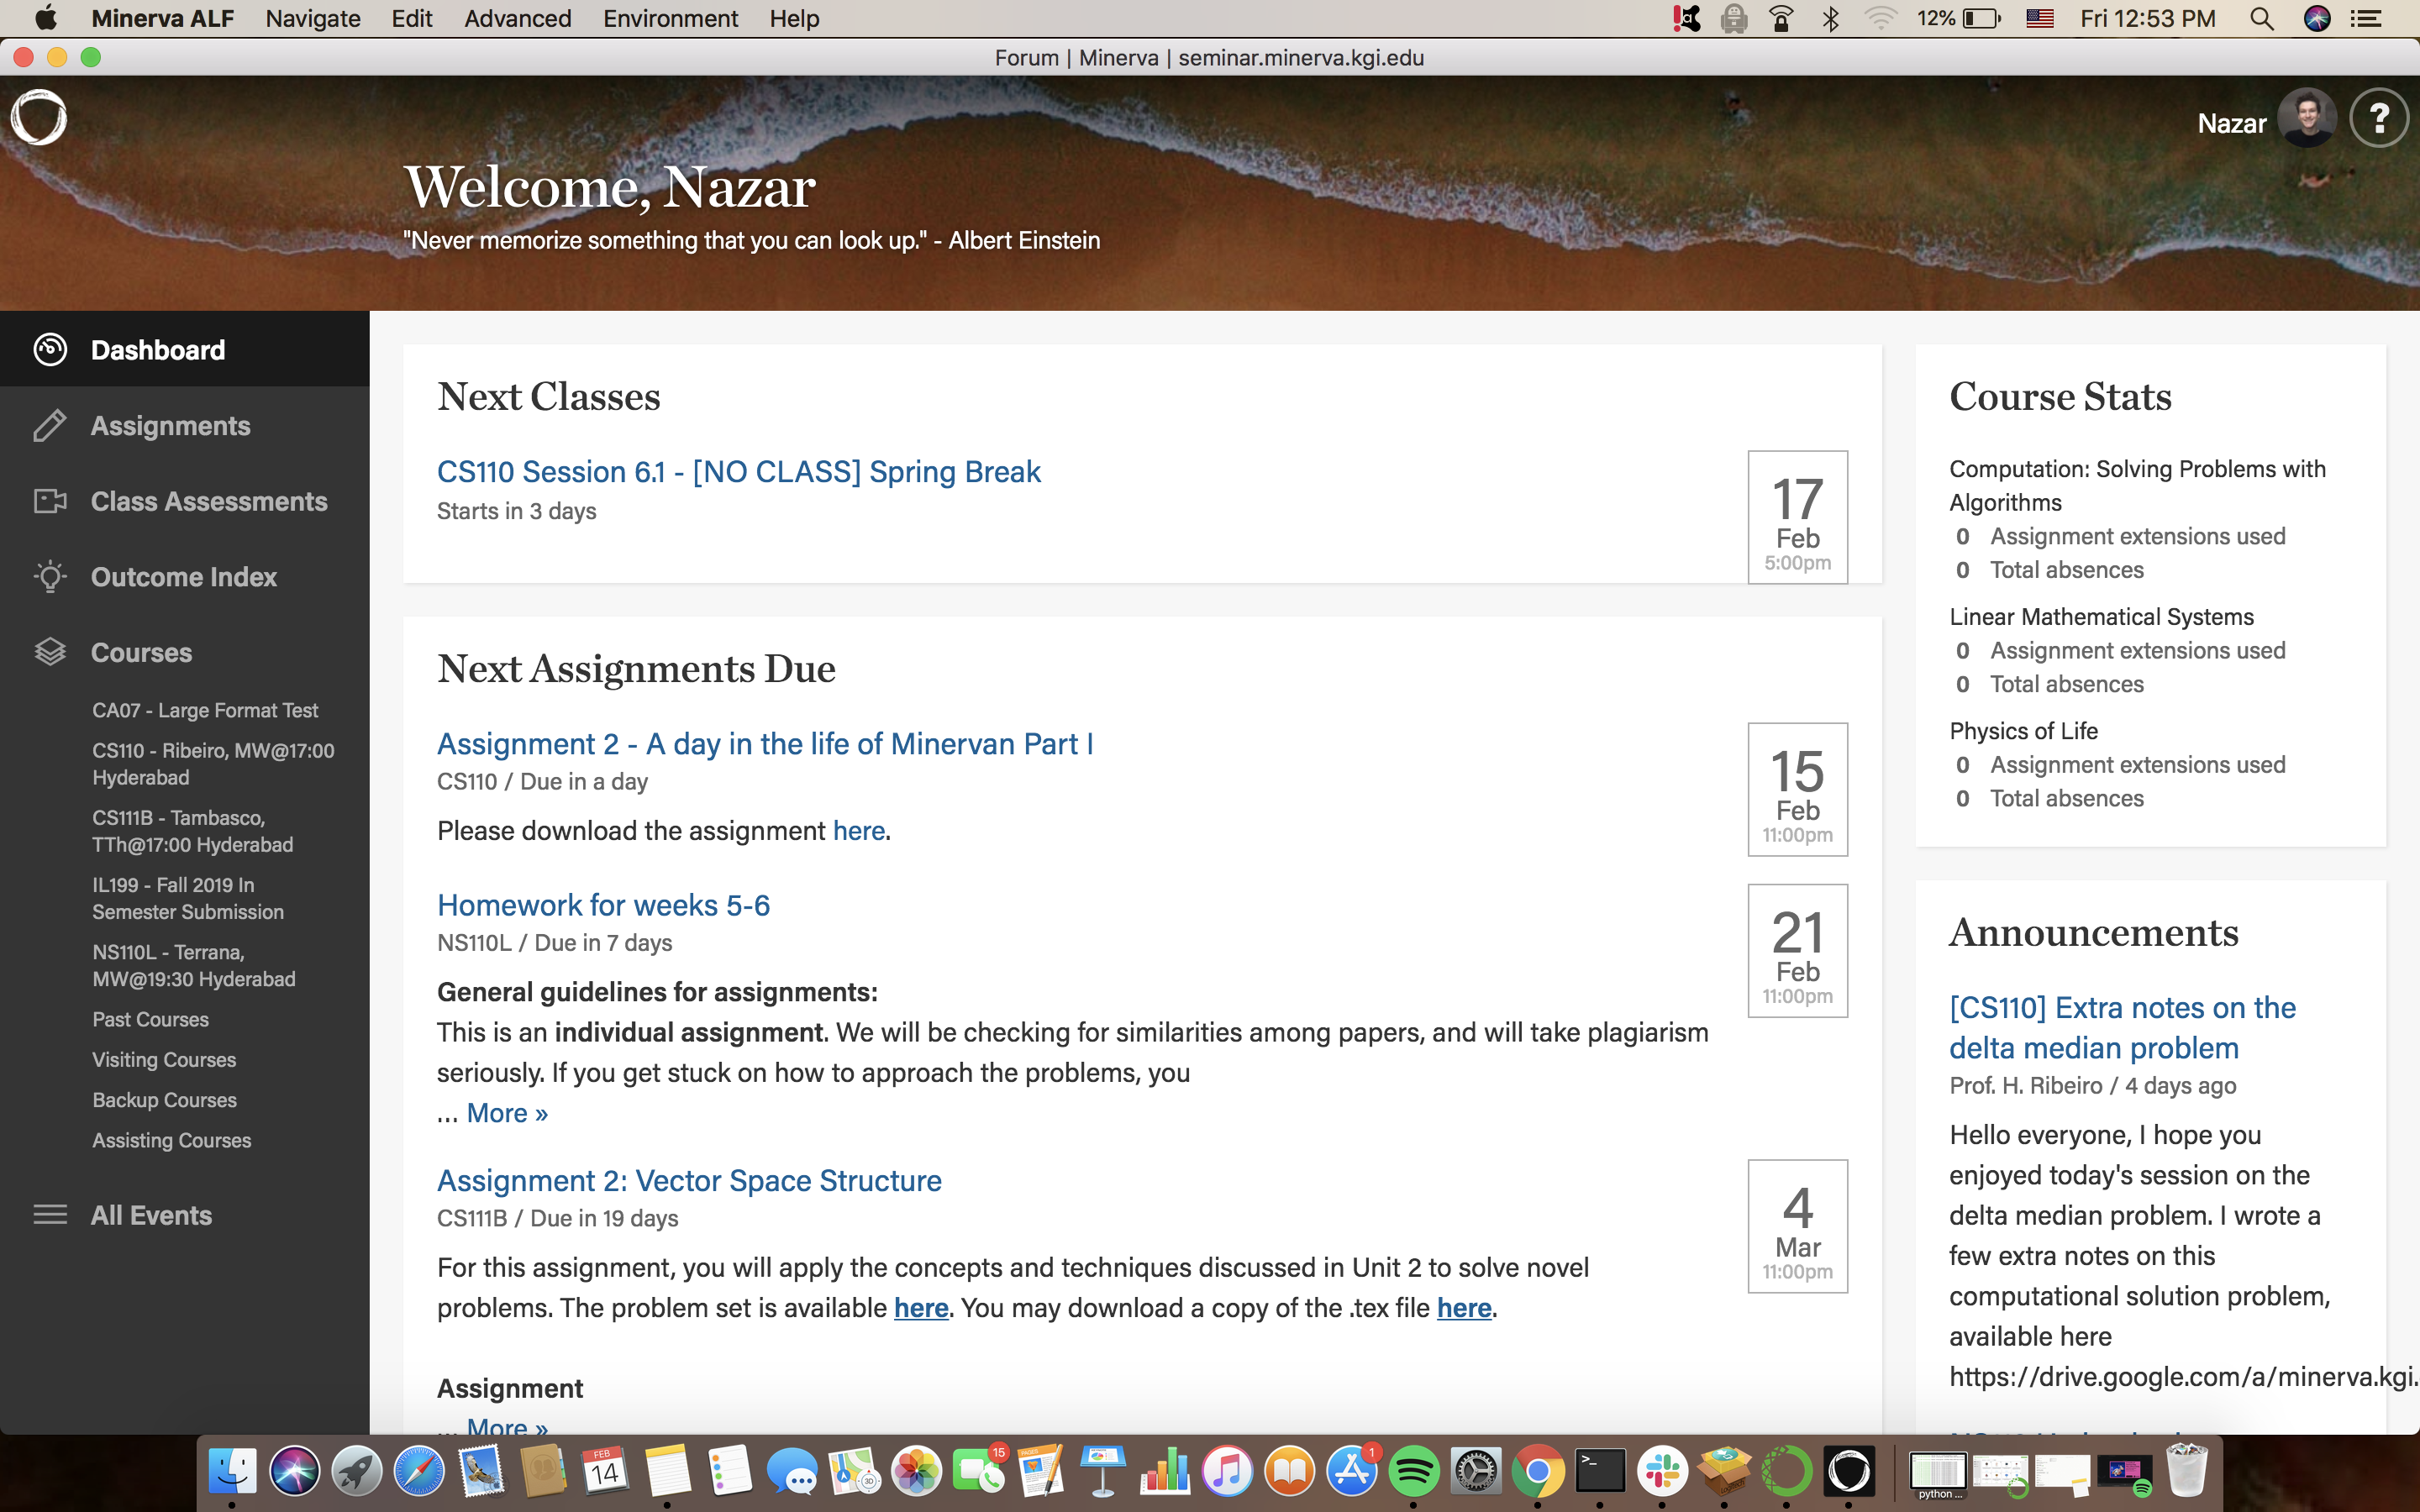

In [603]:
from IPython.display import Image
Image(filename='Screen Shot 2020-02-14 at 12.53.04 PM.png')

## Part B [#ComputationalSolutions, #DataStructures]

Prepare a table containing a list of all the activities that you plan to do in the city of your rotation, with a short, compelling justification why they are interesting. Make sure you plan activities that involve visiting landmarks or other locations that highlight particular socio-culture aspects of the rotation city where you are. An activity is decomposed in a set of tasks which are exclusively of a cultural nature (not routine nor academic). Your assignment needs to include:
* At least 5 activities and each activity can be subdivided into 3 to k tasks.
* 3 of the activities must be culturally specific to your rotation city.  Make sure to include at least 1 picture per activity.

For example, if you want to visit the Neues Museum, this will be one of the tasks satisfying these requirements. Reasonable subtasks will include: checking the timetable for the museum exhibitions on its webpage, take the bus/tram from the residence hall to the museum, enjoy an exhibition, have lunch in the cafeteria, visit the souvenir’s shop, take the bus/tram back home.

How will you store information about these activities and sub-tasks?



I will store my tasks using Python lists. Each list will contain all necessary information about the tasks such as task id, task description, time required for a task, and a list of tasks it depends on.

In [677]:
tasks = [[0, 'Wake up at 8 am', 5,[]],
         [1, 'Brush my teeth', 5,[0]],
         [2, 'Put on comfortable clothes and leave', 10,[0]],
         [3, 'Practiice yoga', 60, [0,2]],
         [4, 'Buy a coconut on the way back', 5,[0,2]],
         [5, 'Take shower after class', 15,[0]],
         [6, 'Work on my assignment', 120,[0]],
         [7, 'Get dressed', 10,[0]],
         [8, 'Find the location of Charminar in Google Maps', 5,[0]],
         [9, 'Take a tuk tuk to the place', 30,[0,7]],
         [10, 'Enjoy the architecture', 60,[0,7,8]],
         [11, 'Shop at the local shops', 60,[0,7,8]],
         [12, 'Have lunch and nice conversations with my friends', 60,[0,7]],
         [13, 'Take a tuk tuk to the local market', 30,[0,7]],
         [14, 'Find nice earings for my mom', 60,[0,7,13]],
         [15, 'Negotiate for a lower price', 10,[0,7,13]],
         [16, 'Google nice restaurants nearby', 10,[0,7]],
         [17, 'Go to a nice restaurant', 20,[0,16,7]],
         [18, 'Order food and eat dinner', 60,[0,16,7]],
         [19, 'Pay and leave back to the residence hall', 40,[0,7,18]],
         [20, 'Change into my pajamas', 10,[0,7]],
         [21, 'Invite my friends to play mafia and rest', 20,[0,20]],
         [22, 'Use my acting skills to fool everyone that I am not mafia', 120,[0,19,20]],
         [23, 'Brush my teeth', 5,[0,20]],
         [24, 'Read Harry Potter before bed', 60,[0,20]],
         [25, 'Go to bed', 10,[0,24]],
        ]

The major activities include:  
1. Morning yoga.  
2. Working on an assignment.  
3. Visiting the local art market and buying Indian accessories.  
4. Enjoying architecture of sharminar while shopping at the local stores.
5. Playing Mafia with my friends in the evening.

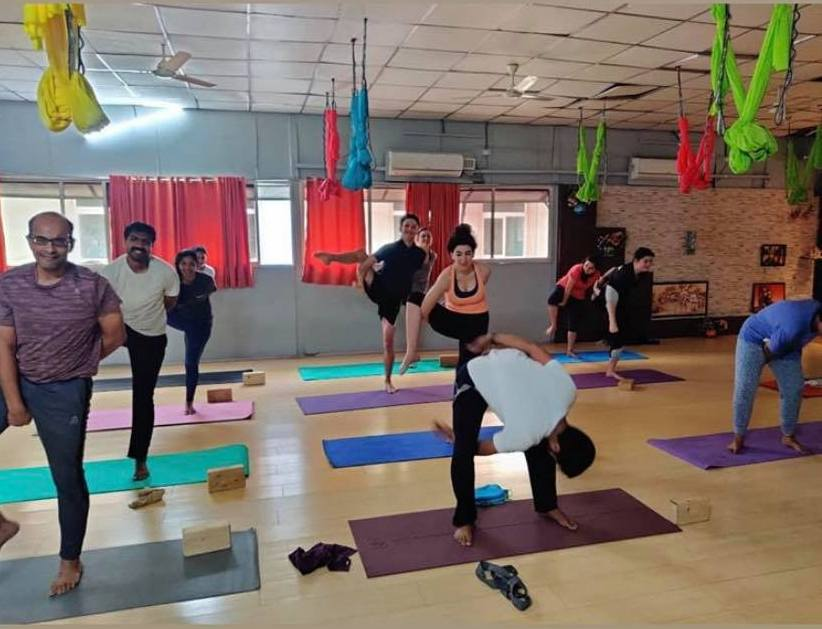

In [678]:
from IPython.display import Image
Image(filename='85015380_254254138902364_6936034568545763328_n.jpg')

This picture was taken by my yoga teacher and you can clearly see profound my yoga skills are

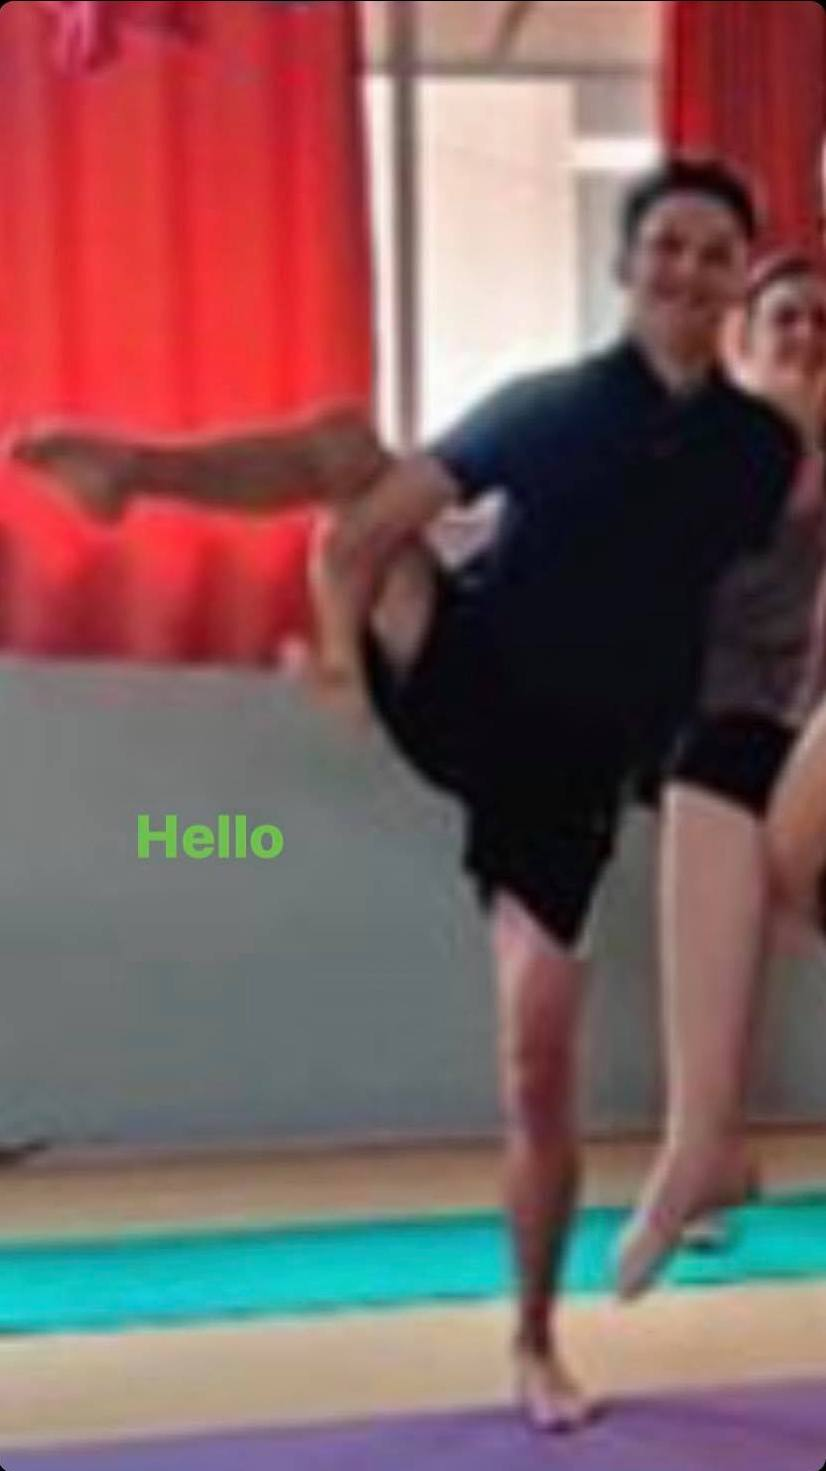

In [679]:
from IPython.display import Image
Image(filename='86933726_1268768109982325_4756493954663317504_n.jpg')

A closer look

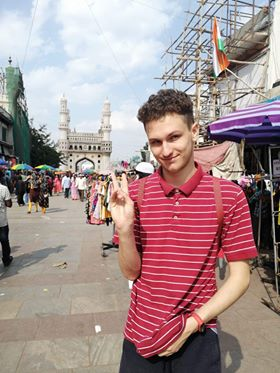

In [680]:
from IPython.display import Image
Image(filename='85094050_525028351704641_5549962757140381696_n.jpg')

Charminar

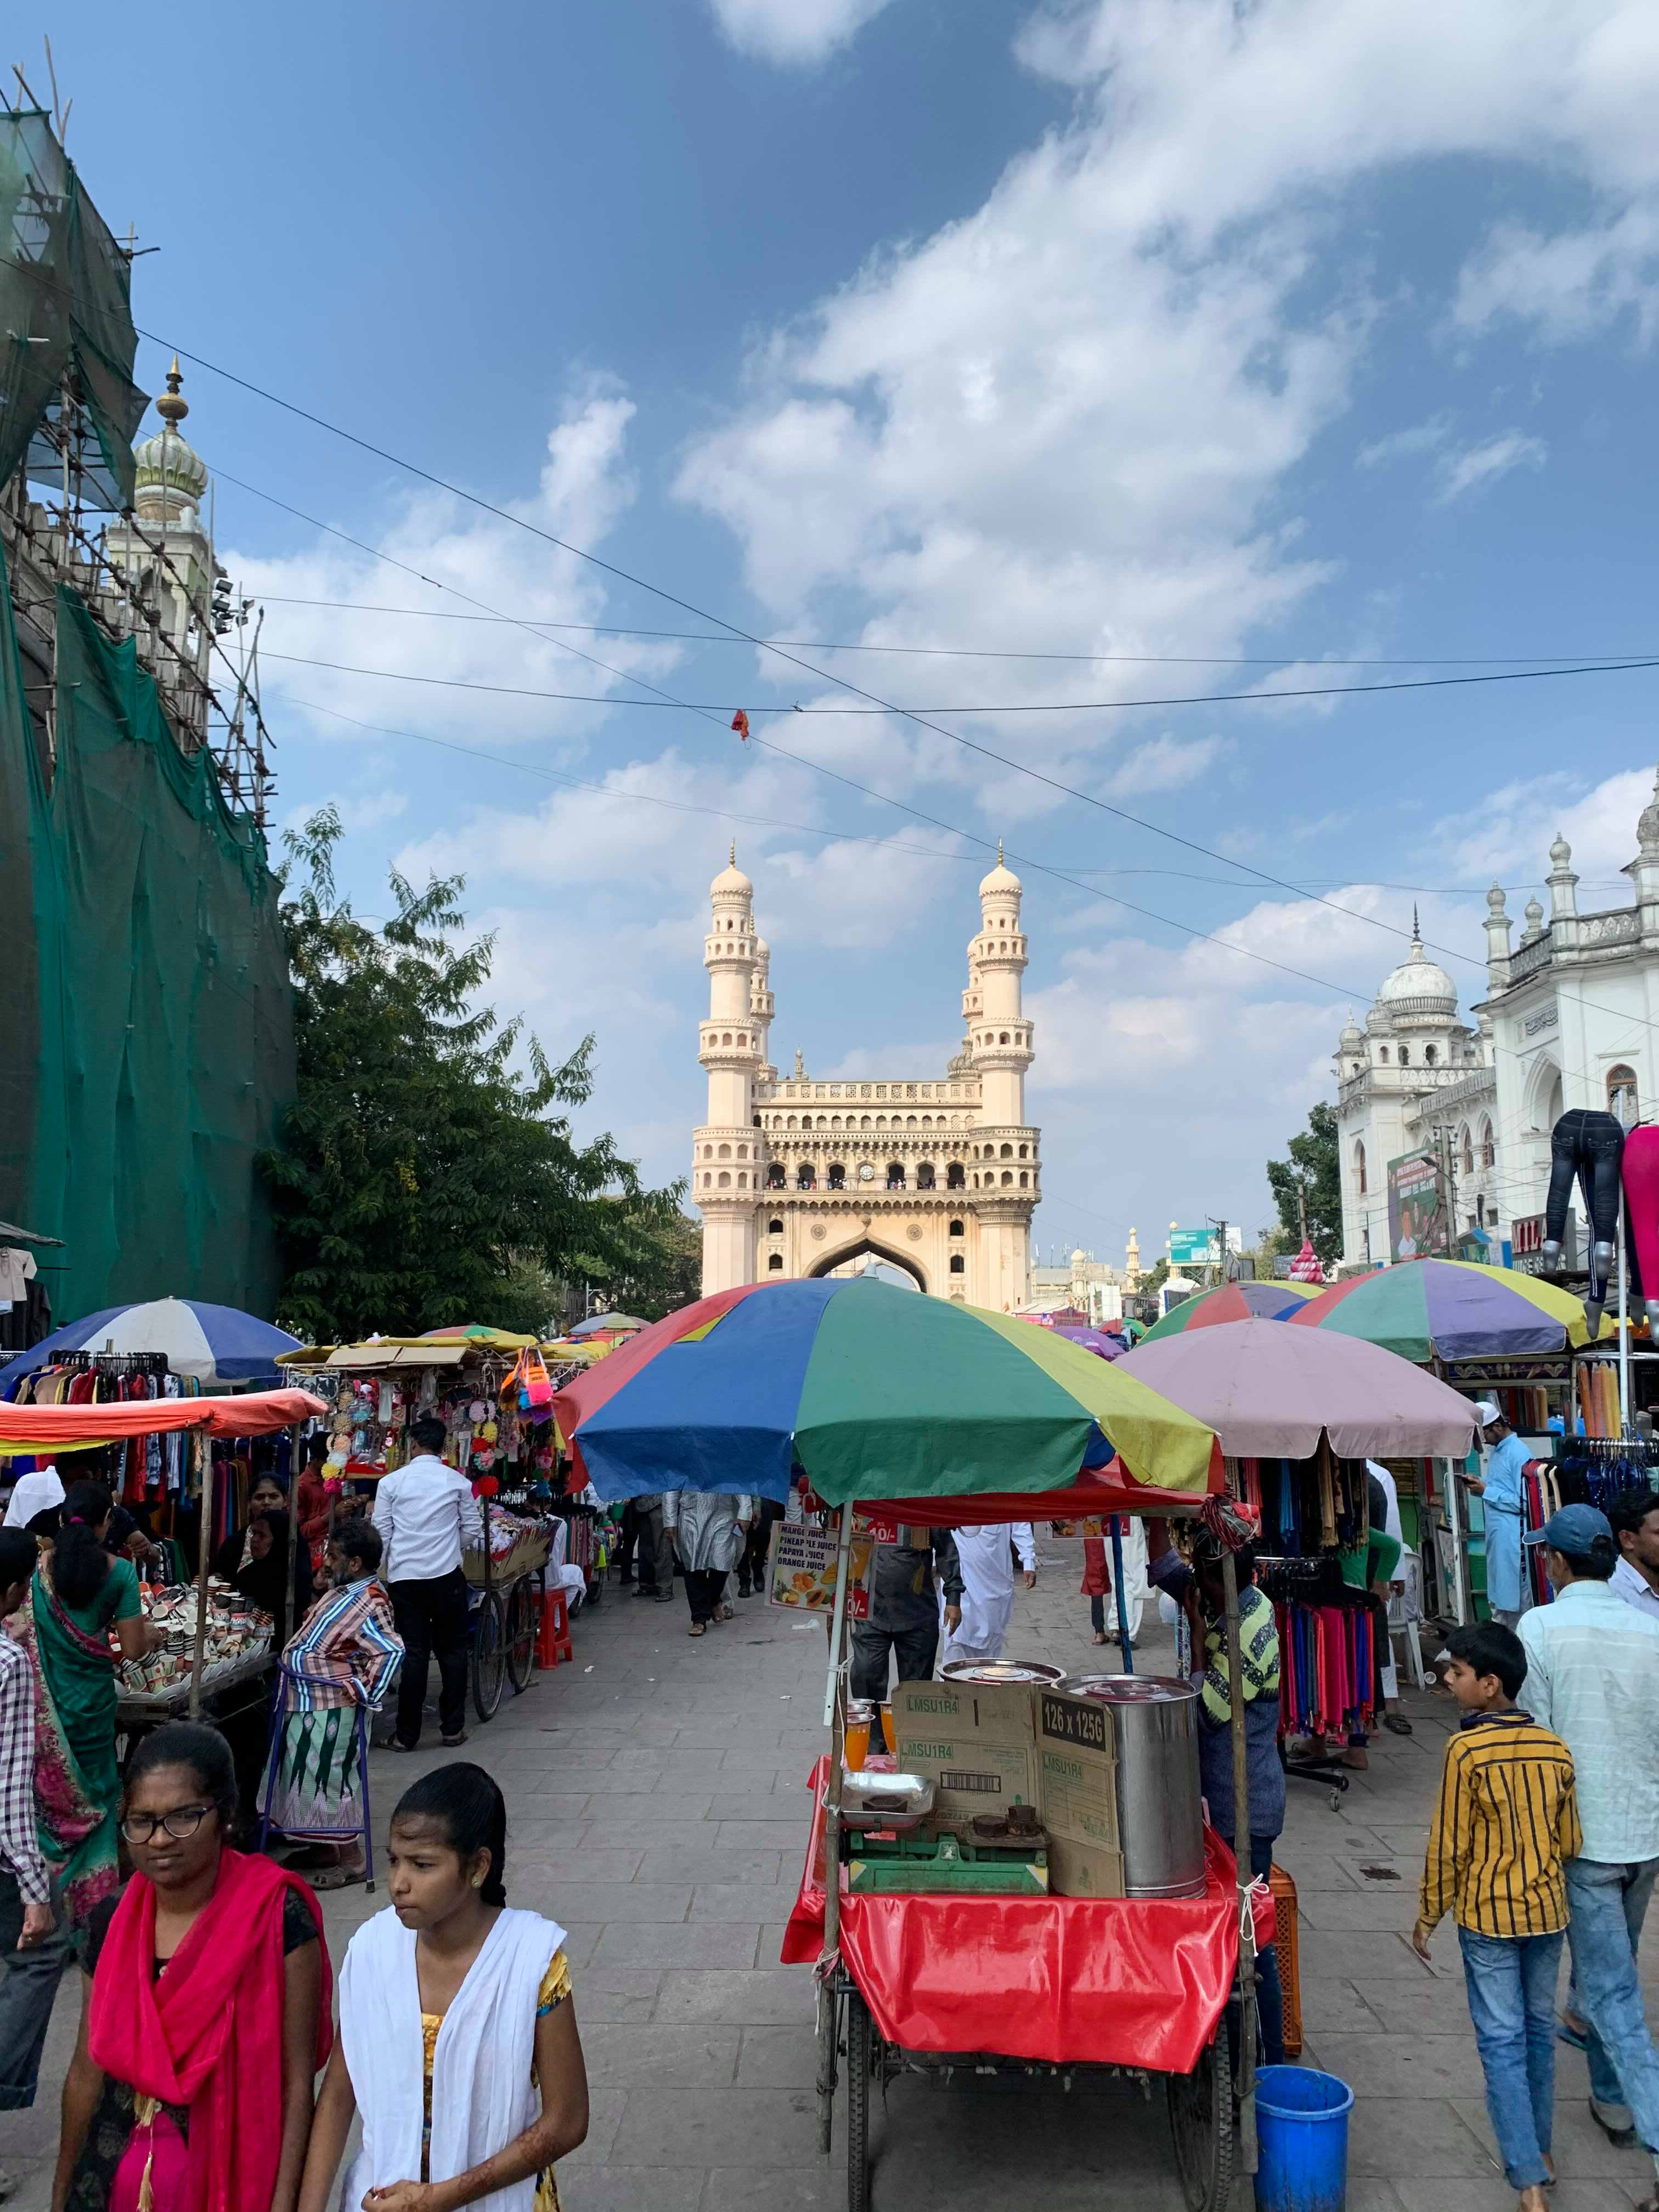

In [681]:
from IPython.display import Image
Image(filename='86487165_563705874231707_5389714331870953472_n.jpg')

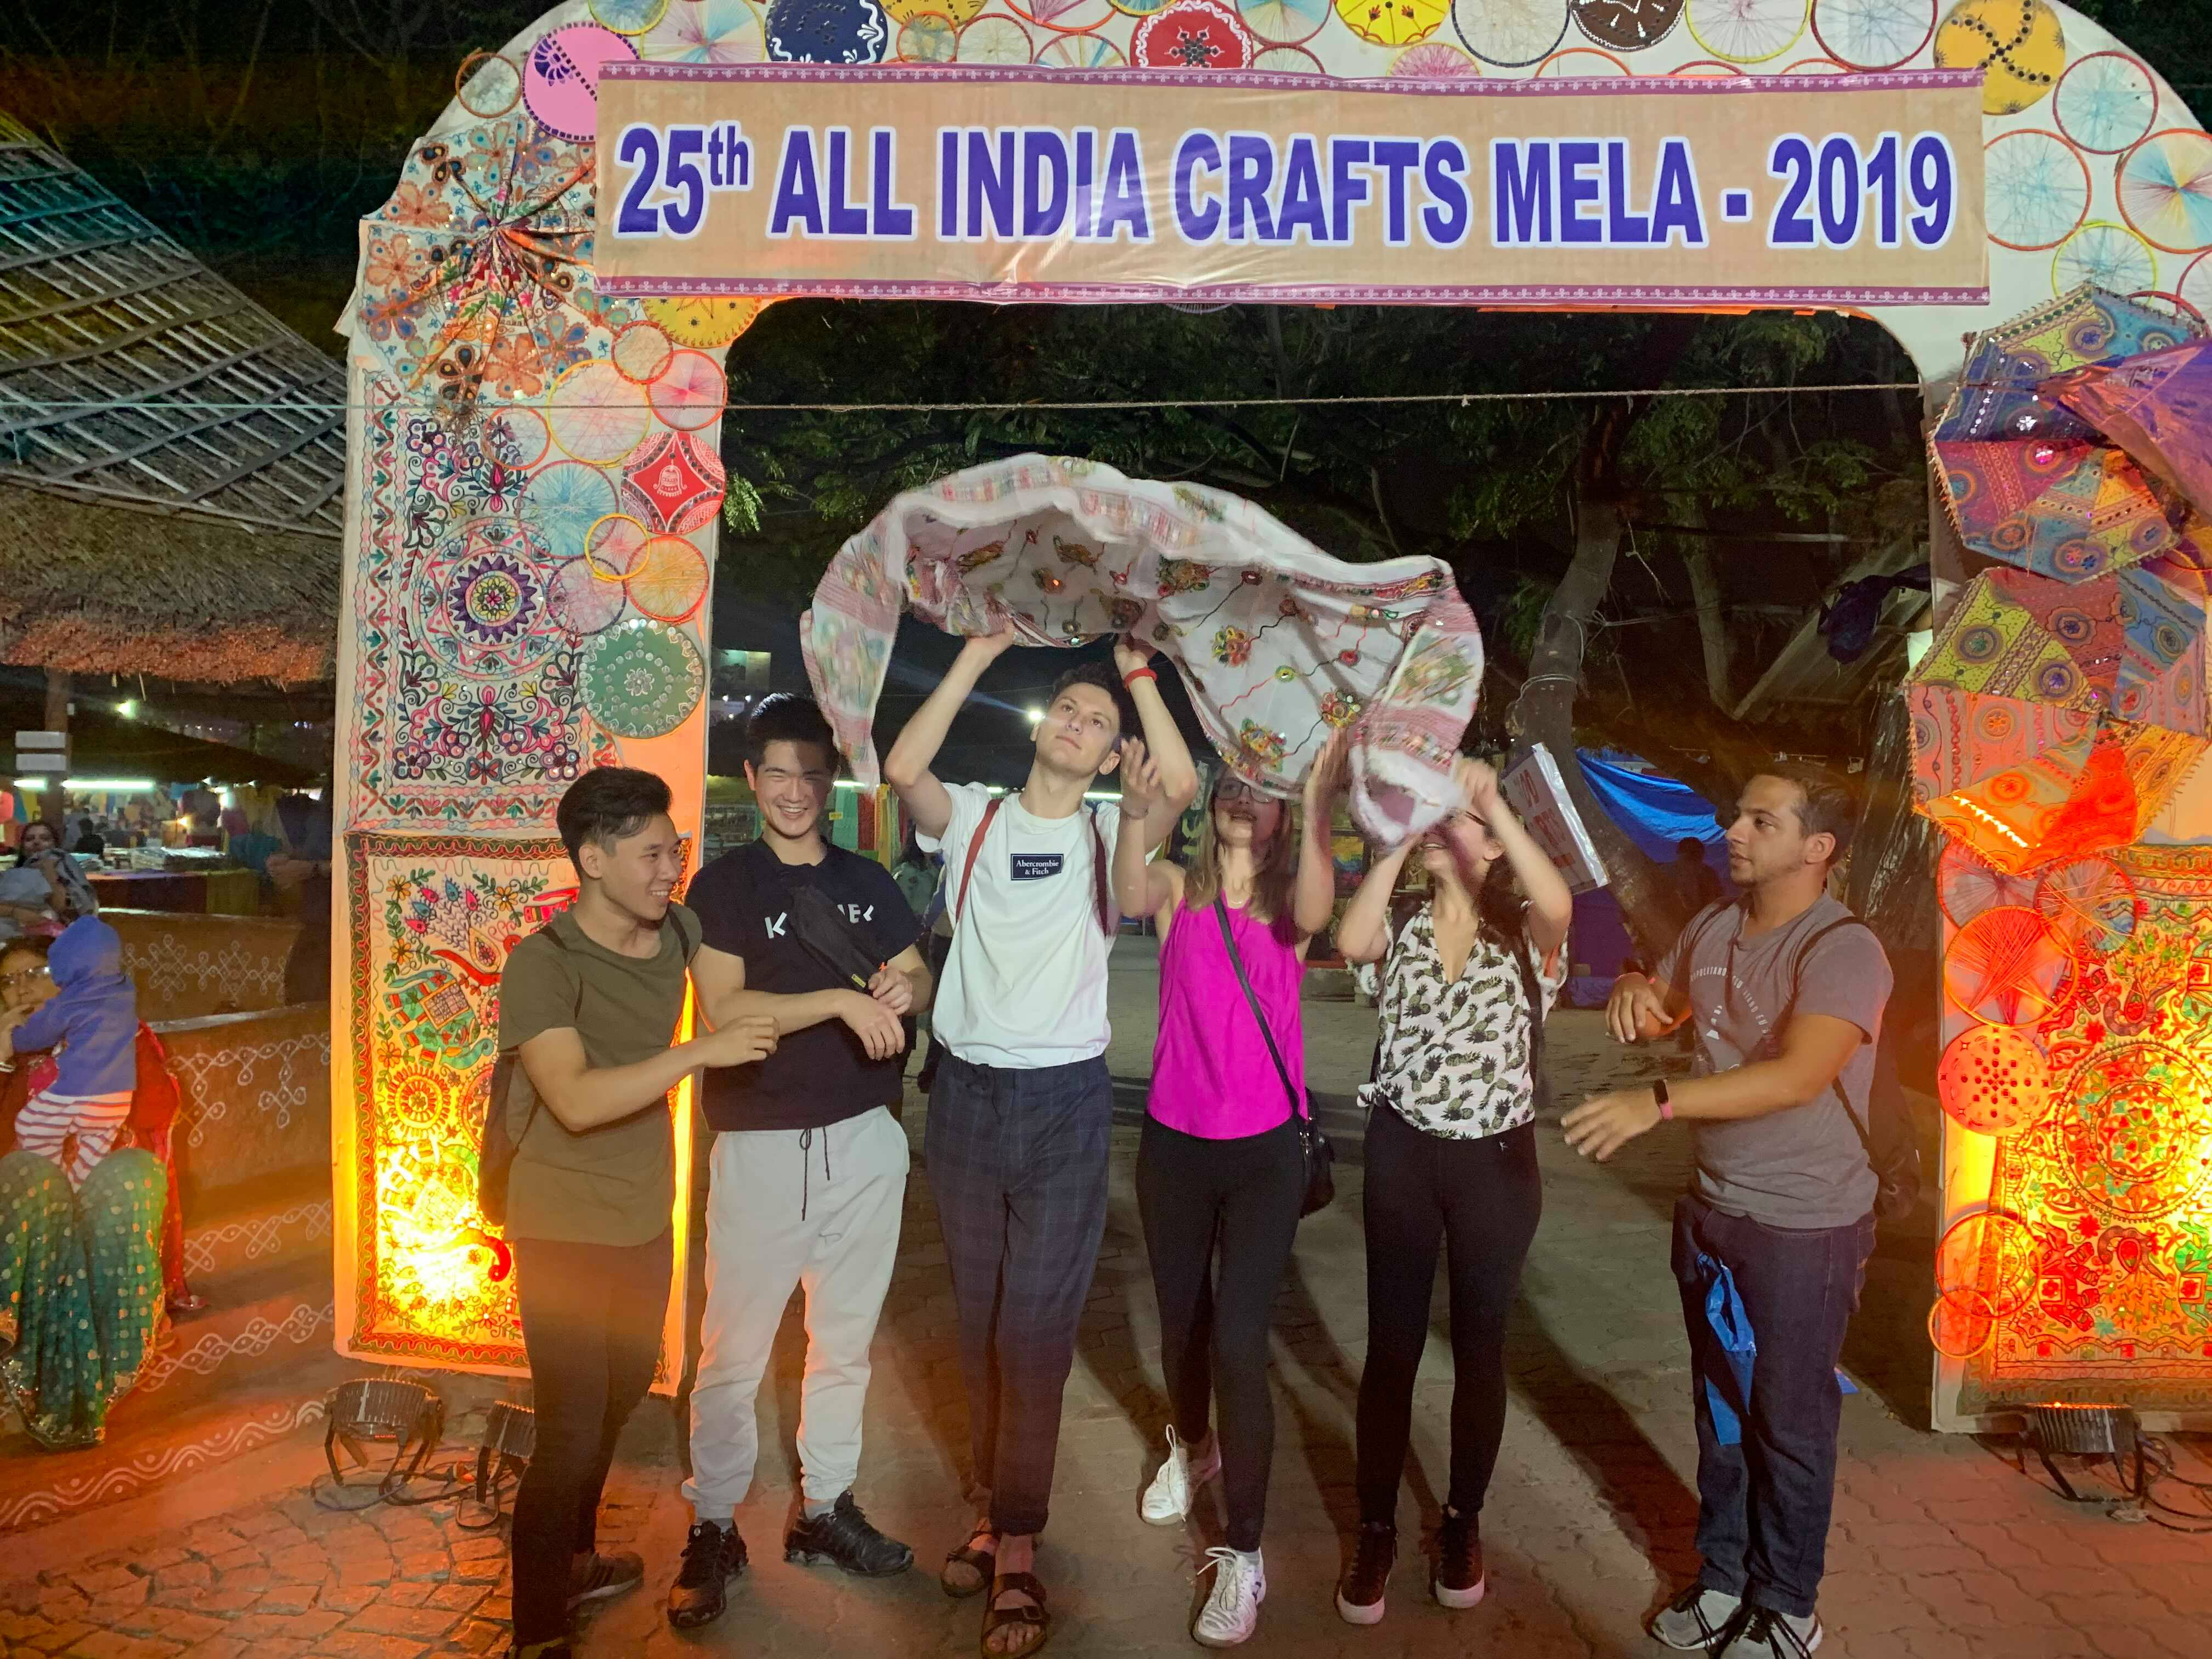

In [682]:
from IPython.display import Image
Image(filename='85085728_182209503088168_4129820885731246080_n.jpg')

Local art market - I did not find the earings, but got a cool scarf!  
Note: the picture is taken the next day, because I had a very busy week and after asking for professor's permission, I went to the local art market the next day!

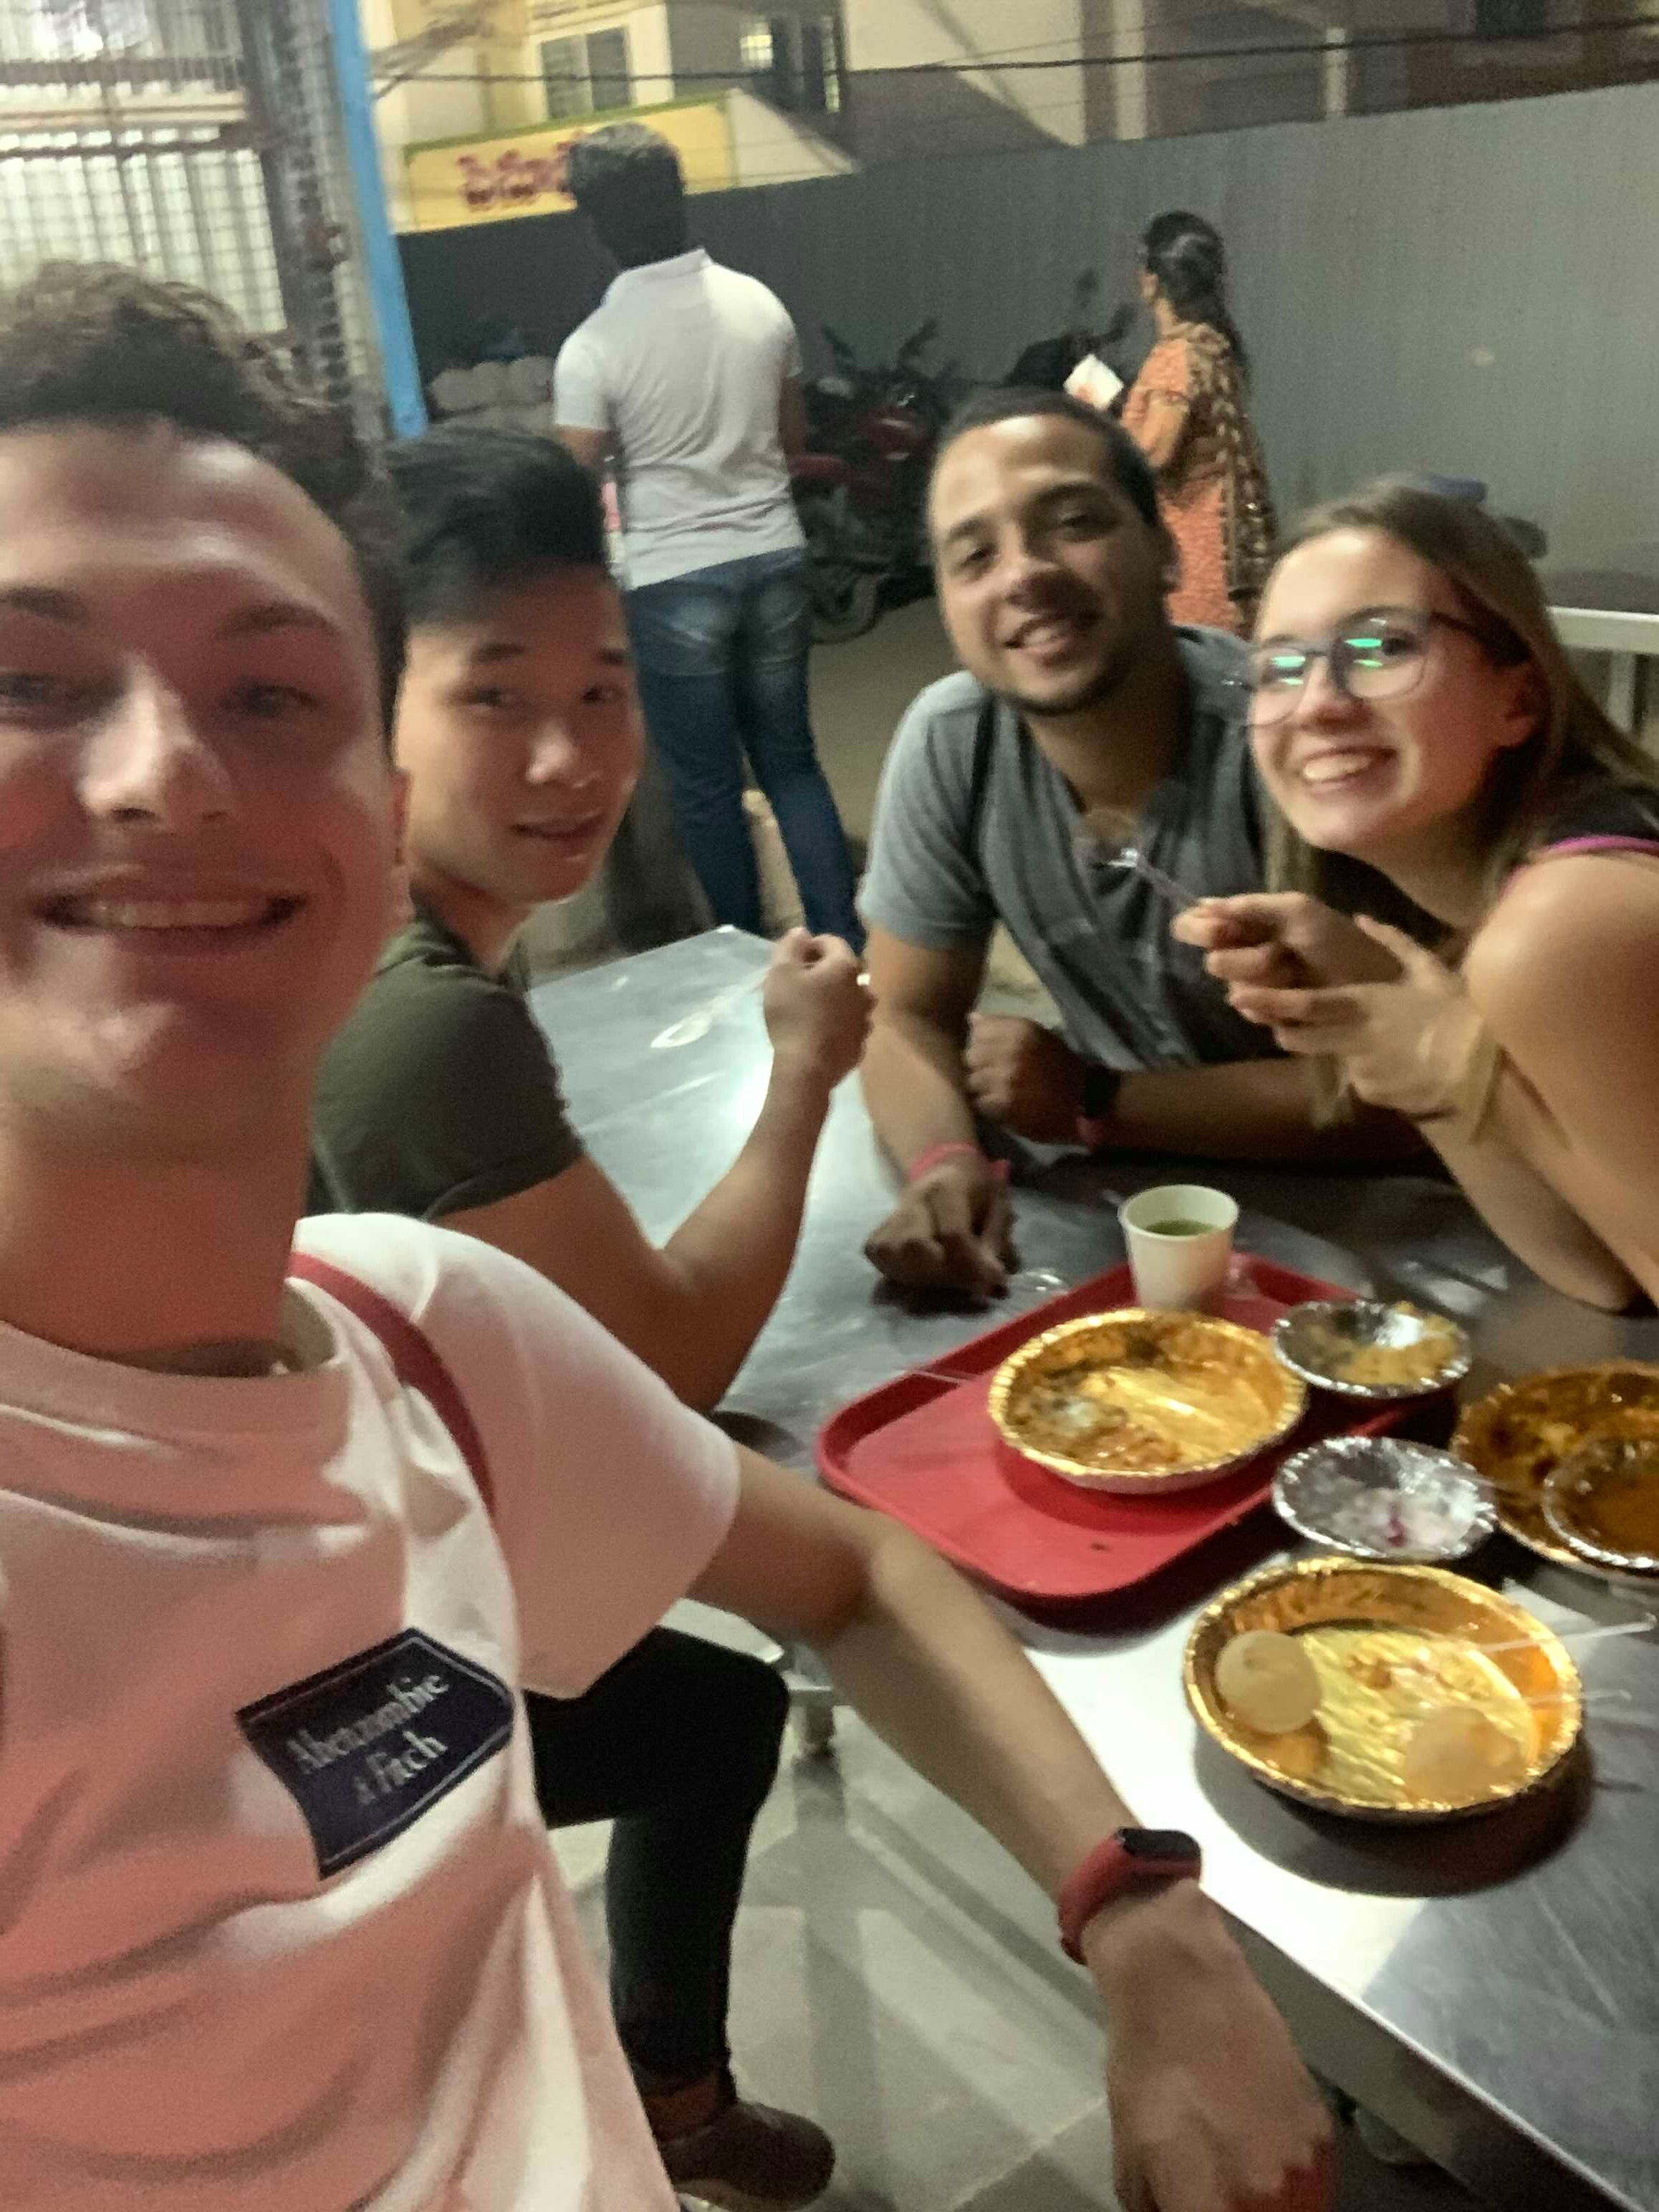

In [683]:
from IPython.display import Image
Image(filename='85234796_1089673151374141_2255382782777753600_n.jpg')

Dinner after the art market visit.

## Part C [#PythonProgramming, #CodeReadability]

Write a Task Priority Scheduler in Python 3, which receives the list of tasks above as input and returns a day task schedule for you to follow. Please refrain from using any external Python library besides the math and random module (if you intend on using other libraries, please check with your course instructor first).  

**Your Computational Solution to the Task Scheduler.**

You can organize your list of tasks using Python lists as we studied in one of lesson 4.1 activities. Of course, you may choose to make an improvement and choose to implement the list of tasks using a different Python data type (e.g. Python dictionaries, classes, NumPy arrays,  etc). In all cases, make sure your internal representation of the list of tasks has all the fields described in Figure 1.  Your implementation of the task scheduler must report at the end of every time-step which task is being performed and the remaining time for that task.  Additionally, your scheduler must report every time a task is completed.  The scheduler ends when all tasks have been completed.

**Input:** list of tasks, current time for the scheduler (in minutes), time-step (in minutes).

**Output:** periodic reports of the current task being executed (every time-step), report of task completions, report whenever the scheduler has completed all tasks.

Below you are given an example of what the input and output may look like, taken from the activity in lesson 4.1. Note that this is only an example and you can improve the formatting and presentation of the output, as long as it meets all the requirements for the output above.

Example code:
```python
tasks = [[0, 'get up at 8:00 AM', 10, [],], 
         [1, 'get dressed and ready', 15, [0]],
         [2, 'eat healthy breakfast',40, [0]]
        ]
my_scheduler(tasks, step_size, init_time)
print("Completed all planned tasks")
```

Example output:
```
Simple Scheduler at time: 8h0 executing task:0 remaining time10
Completed Task:0 - get up at 8:00 AM
Simple Scheduler at time: 8h10 executing task:1 remaining time15
Simple Scheduler at time: 8h20 executing task:1 remaining time5
Completed Task:1 - get dressed and ready
Simple Scheduler at time: 8h25 executing task:2 remaining time40
Simple Scheduler at time: 8h35 executing task:2 remaining time30
Simple Scheduler at time: 8h45 executing task:2 remaining time20
Simple Scheduler at time: 8h55 executing task:2 remaining time10
Completed Task:2 - eat healthy breakfast
Completed all planned tasks
```


In [684]:
ntasks=25
def left(i):         # left(i): takes as input the array index of a parent node in the binary tree and 
    return 2*i + 1   #          returns the array index of its left child.

def right(i):        # right(i): takes as input the array index of a parent node in the binary tree and 
    return 2*i + 2   #           returns the array index of its right child.

def parent(i):       # parent(i): takes as input the array index of a node in the binary tree and
    return (i-1)//2


def initialize_tasks(tsks):
    #Input: list of tasks 
    #Output: initializes all tasks with default status (not yet in the priority queue).
    for i in range(ntasks+1):
        tasks[i].append('Not yet started')
        
def print_input_tasks(tsks): 
    # Input: list of tasks 
    # Task Status:
    # 'Not yet started' : Not yet in priority queue (default status)
    # 'In progress' : In priority queue
    # 'Completed' : Completed
    # Output: print statement with all the tasks to be included in the scheduler
        
    print('Input List of Tasks')
    for t in tsks:
        print(f"task:{t[0]} \t {t[1]} \t duration:{t[2]} \t depends on: {t[3]} \t Status: {t[4]}")

def heapify(heap, i):
    #setting up the variables that find the indeces of the nodes' children
    l = left(i)
    r = right(i)
    #finding size of the heap
    heap_size = len(heap)
    #comparing the node its left child
    if l < heap_size and heap[l][0] < heap[i][0]:
        #if the left child is smaller then setitng the index of left child to be the smallest, if not, then node's indext is the smallest
        smallest = l
    else:
        smallest = i
        #comparing the node its right child
    if r < heap_size and heap[r][0] < heap[smallest][0]:
        #if the right child is smaller then setitng the index of right child to be the smallest, if not, then node's indext is the smallest
        smallest = r
        #if in the end, the node isn't the smallest, one of its children takes its place
    if smallest != i:
        heap[i], heap[smallest] = heap[smallest],heap[i]
        heapify(heap, smallest)
        
def build_min_heap(heap):
    #find size of the heap
    heap_size = len(heap)
    #applies the heapigy function to build the minimum heap
    for i in range(int(len(heap)/2), -1, -1):
        heapify(heap, i)
    return heap

def decrease_key(heap, i, key): 
    #this function is needed for the heappush function
    #checking if the key is bigger then the root of the heap
    if key[0] > heap[i][0]:
        raise ValueError('new key is bigger than the current key')
    #setting the root to be the key
    heap[i][0] = key[0]
    #here we swap the new key until the min heap property is achieved
    while i > 0 and heap[parent(i)][0] > heap[i][0]:
        j = parent(i)
        holder = heap[j]
        heap[j] = heap[i]
        heap[i] = holder
        i = j    

        
def heappush(heap, key):   
    # This function inserts the value of key onto the priority queue, maintaining the max heap invariant.
    heap.append([float("inf"), 0])
    decrease_key(heap, len(heap)-1,key)

def heappop(heap):
    #checking if the heap is not empty
    if len(heap) < 1:
        raise ValueError('Heap underflow: There are no keys in the priority queue ')
    #the minimal value is in the root
    mink = heap[0]
    #setting the last value to be in the root
    heap[0] = heap[-1]
    #deleting the root node
    heap.pop()
    #heapifying the heap to maintain the min heap property
    heapify(heap, 0)
    return mink

def unscheduled_tasks( tsks ):
    #Input: list of tasks 
    #Output: boolean (checks the status of all tasks and returns `True` if at least one task has status = 'N')
    #this function checks the tasks that are not started yet
    for t in tsks:
        if t[4] == 'Not yet started':
            return True

def get_ready_tsks( tsks ): 
    #Implements step 1 of the scheduler
    #Input: list of tasks
    #Output: list of tasks that are ready to execute (i.e. tasks with no pendending task dependencies)
    rtsks = []
    #checks if the task is not started and if it has no dependencies
    for i in range(ntasks+1):
        if tsks[i][4] == 'Not yet started' and not tsks[i][3]:   
            #and changes the status of the task
            tsks[i][4] = 'In progress'     
            # add (task_id, duration) to the list of tasks 
            # to be pushed onto the priority queue
            rtsks.append((tsks[i][0],tsks[i][2]))                                        
    return rtsks

def remove_dependency( tsks, tid ):
    #Input: list of tasks and task_id of the task just completed
    #Output: lists of tasks with t_id removed
    for t in range(ntasks+1):
        #if the the task id is in the dependencies list of other tasks and it is completed, 
        #we delete it from the dependencies
        if tsks[t][0] != tid and tid in tsks[t][3]:
            tsks[t][3].remove(tid)
    


In [685]:
def add_tasks_pqueue(pqueue, rtsks):
    #Input: list of tasks
    #Output: priority queue (created using the heapq module)
    
    #checking if there are remaining tasks and if the priority queue is empty
    if rtsks:
        if not pqueue: 
            #adding the remaining tasks and building a min heap
            pqueue = rtsks
            build_min_heap(pqueue)
            
        else:
            #if no tasks in the queue, then we will push them into the queue
            for t in rtsks:
                heappush(pqueue, t)
                
    return pqueue

In [686]:
def my_scheduler(tasks, step_size, init_time):
    #creating a priority queue and setting the number of tasks
    pqueue = []
    ntasks = 25
    #initializing tasks and adding them to the priority queue
    initialize_tasks(tasks)
    add_tasks_pqueue(pqueue, tasks)

    while unscheduled_tasks(tasks) or pqueue:
        #extracting tasks ready to execute (those without dependencies) 
        rtsks = get_ready_tsks( tasks )

        #pushing the tasks onto the priority queue
        pqueue = add_tasks_pqueue(pqueue, rtsks)
    
        #checking for tasks in the priority queue.
        if pqueue:  
            
            #getting the tasks on top of the priority queue
            (tid, rtime) = heappop(pqueue)   
        
            print(f"Simple Scheduler at time: {init_time//60}h{init_time%60} executing task:{tid} remaining time{rtime}") 
            tstep = step_size                        # tstep is the scheduler's time step
            if rtime < step_size:                    # If it is less than the step_size take a smaller time step
                tstep = rtime
            #adjusting the tasks remaining time
            rtime -= tstep      
            #update the schedulers clock
            init_time += tstep  
            if rtime == 0:  
                #task has been completed
                tasks[tid][4] = 'Completed' 
                print(f"Completed Task:{tid} - {tasks[tid][1]}") 
                #removing this task's id from other tasks' dependencies
                remove_dependency(tasks, tid)
                init_time += tasks[tid][2]
            
            else: 
                #if the remaining time is bigger than the step size, we will subtract the step_size 
                #from the remaining time and add it to the current time
                rtime = tasks[tid][2] 
                while rtime != 0:
                    rtime -= tstep 
                    print(f"Simple Scheduler at time: {init_time//60}h{init_time%60} executing task:{tid} remaining time{rtime}")
                    init_time += tstep 
                #task has been completed
                tasks[tid][4] = 'Completed'   
                print(f"Completed Task:{tid} - {tasks[tid][1]}") 
                #removing this task's id from other tasks' dependencies
                remove_dependency(tasks, tid)         
    print("Completed all planned tasks")
    
print(my_scheduler(tasks, 5, 480))

Simple Scheduler at time: 8h0 executing task:0 remaining time5
Completed Task:0 - Wake up at 8 am
Simple Scheduler at time: 8h10 executing task:1 remaining time5
Completed Task:1 - Brush my teeth
Simple Scheduler at time: 8h20 executing task:2 remaining time10
Simple Scheduler at time: 8h25 executing task:2 remaining time5
Simple Scheduler at time: 8h30 executing task:2 remaining time0
Completed Task:2 - Put on comfortable clothes and leave
Simple Scheduler at time: 8h35 executing task:3 remaining time0
Completed Task:3 - Practiice yoga
Simple Scheduler at time: 9h35 executing task:4 remaining time0
Completed Task:4 - Buy a coconut on the way back
Simple Scheduler at time: 9h40 executing task:5 remaining time15
Simple Scheduler at time: 9h45 executing task:5 remaining time10
Simple Scheduler at time: 9h50 executing task:5 remaining time5
Simple Scheduler at time: 9h55 executing task:5 remaining time0
Completed Task:5 - Take shower after class
Simple Scheduler at time: 10h0 executing ta

## Part D [#ComputationalSolutions]
Now, you realize that some of the tasks in your schedule can be multitasked! This is, many of your daily tasks can be performed simultaneously (e.g. sipping a local beverage while chatting with a friend at a cafe, taking pictures while riding a bus or walking in a park). In this section, you need to review your computational solution to the task scheduler, and now include the handling of multitasking. Notice that while some tasks can be multitasked, others cannot because they require your full attention (e.g. CS110 pre-class work).

This revised version of the scheduler receives a list of tasks in a table of the form shown below:

<h5><center> Task_ID | Task Description | Task Duration | List of Task Dependencies | Multitasking | Task Status</center></h5>

Part D does not require any code but you will be asked to provide a Python implementation in Part E.

* **Multitasking.** It is a boolean field (True/False) determining whether a task can be multitasked.

* **Criteria for scheduling Non-Multitasking tasks.** These tasks require your full attention, therefore your scheduler cannot schedule any other tasks while a non-multitasking task has not been completed. After completion of a non-multitasking task, make sure to update the dependencies of any other tasks (where appropriate) and the corresponding priorities.


* **Criteria for scheduling Multitasking tasks.** These tasks can share the time you dedicate to them. Notice that when multitasking, the tasks may have a different duration time,  and you will need to keep track of the remaining time for every task being processed in multitasking mode and update the scheduler clock accordingly.   In fact, when two or more multitasking tasks are being executed, the remaining time of every task needs to be adjusted at the same time. Notice that because multitasking tasks have different duration times, they will be completed at different times.

    *Hint*: You may wonder how to prevent two multitasking tasks that are not compatible with happening at the same time. For example, eat a delicious pizza and brushing your teeth. These two tasks can be performed in multitasking but they don’t make sense together. Let’s say that you decide to eat your pizza and then brush your teeth but not the other way around, in this case you may want to use the concept of dependencies to establish an order.

Describe any changes you will need to make to the first version of the scheduler. You are asked to implement this schedule in Python in the next section.


My strategy will be to create a function (multitask()) that will check if the values of the "Multitask" parameter of the task with index i and the task with index i+1 are True. If such condition is true, the function will return the task id and remaining time of the task with index i+1. For instance, using the function on task #10 (Enjoy the architecture) will return the task id and remaining time of "shop at the local shops" because both can be multitasked. Further, I will update the function that completes the tasks and updates the current and remaining times. I will add a condition that checks if multitask(tid) is true and if it is true, I will assign this task and the task after it to be completed. In order to make sure that my timer shows the correct current time, I will check the difference between the time it takes for each task to be completed. If the task i takes for example 40 minutes and task i+1 takes 60 minutes, then I will subtract 40 from the current time after the completion of both tasks. The reason for this is that my scheduler will go through task i+1 one more time and update the current time with the remaining time of task i+1 (60), however since we are multitasking, tasks i and i+1 will take as much time as a bigger value between their remaining times. This approach will be shown in the code below. 

## Part E [#PythonProgramming, #CodeReadability]

Write a Task Priority Scheduler with Multitasking capability in Python 3, which receives as input a list of tasks as depicted in Figure 2, and reports (output) at the end of every time-step which task is being performed and the remaining time for that task.  Additionally, your scheduler must report every time a task is completed. Please refrain from using any external Python library besides the math and random module (if you intend on using other libraries, please check with your course instructor first).  

**Input:** list of tasks, current time for the scheduler (in minutes), time-step (in minutes).
**Output:** periodic reports of the current task(s) being executed (every time-step), report of  task completions, report whenever the scheduler has completed all tasks. 

See example code for the input and output in Part C


In [687]:
#tasks with a new parameter
tasks = [[0, 'Wake up at 8 am', 5,[],False],
         [1, 'Brush my teeth', 5,[0],False],
         [2, 'Put on comfortable clothes and leave', 10,[0],False],
         [3, 'Practiice yoga', 60, [0,2],False],
         [4, 'Buy a coconut on the way back', 5,[0,2],False],
         [5, 'Take shower after class', 15,[0],False],
         [6, 'Work on my assignment', 120,[0],False],
         [7, 'Get dressed', 10,[0],False],
         [8, 'Find the location of Charminar in Google Maps', 5,[0],False],
         [9, 'Take a tuk tuk to the place', 30,[0,7],False],
         [10, 'Enjoy the architecture', 60,[0,7,8],True],
         [11, 'Shop at the local shops', 60,[0,7,8],True],
         [12, 'Have lunch and nice conversations with my friends', 60,[0,7],False],
         [13, 'Take a tuk tuk to the local market', 30,[0,7],False],
         [14, 'Find nice earings for my mom', 60,[0,7,13],True],
         [15, 'Negotiate for a lower price', 10,[0,7,13],True],
         [16, 'Google nice restaurants nearby', 10,[0,7],False],
         [17, 'Go to a nice restaurant', 20,[0,16,7],False],
         [18, 'Order food and eat dinner', 60,[0,16,7],False],
         [19, 'Pay and leave back to the residence hall', 40,[0,7,18],False],
         [20, 'Change into my pajamas', 10,[0,7],False],
         [21, 'Invite my friends to play mafia and rest', 20,[0,20],False],
         [22, 'Use my acting skills to fool everyone that I am not mafia', 120,[0,19,20],False],
         [23, 'Brush my teeth', 5,[0,20],True],
         [24, 'Read Harry Potter before bed', 60,[0,20],True],
         [25, 'Go to bed', 10,[0,24],False],
        ]

In [688]:
ntasks=25
#REUSING THE PREVIOUS FUNCTIONS. THEY HAVE ALREADY BEEN EXPLAINED IN THE PART C
def left(i):         
    return 2*i + 1  

def right(i):       
    return 2*i + 2   

def parent(i):      
    return (i-1)//2


def initialize_tasks(tsks):
    for i in range(ntasks+1):
        tasks[i].append('Not yet started')
        
def print_input_tasks(tsks):
    print('Input List of Tasks')
    for t in tsks:
        print(f"task:{t[0]} \t {t[1]} \t duration:{t[2]} \t depends on: {t[3]} \t Nultitasking: {t[4]} \t Status: {t[5]}")

def heapify(heap, i):
    l = left(i)
    r = right(i)
    heap_size = len(heap)
    if l < heap_size and heap[l][0] < heap[i][0]:
        smallest = l
    else:
        smallest = i
    if r < heap_size and heap[r][0] < heap[smallest][0]:
        smallest = r
    if smallest != i:
        heap[i], heap[smallest] = heap[smallest],heap[i]
        heapify(heap, smallest)
        
def build_min_heap(heap):
    heap_size = len(heap)
    for i in range(int(len(heap)/2), -1, -1):
        heapify(heap, i)
    return heap

def increase_key(heap, i, key): 
    if key[0] > heap[i][0]:
        raise ValueError('new key is smaller than the current key')
    heap[i][0] = key[0]
    while i > 0 and heap[parent(i)][0] > heap[i][0]:
        j = parent(i)
        holder = heap[j]
        heap[j] = heap[i]
        heap[i] = holder
        i = j    

def heappush(heap, key):   
    heap.append([float("inf"), 0])
    increase_key(heap, len(heap)-1,key)

def heappop(heap):
    if len(heap) < 1:
        raise ValueError('Heap underflow: There are no keys in the priority queue ')
    mink = heap[0]
    heap[0] = heap[-1]
    heap.pop()
    heapify(heap, 0)
    return mink

def unscheduled_tasks( tsks ):
    for t in tsks:
        if t[5] == 'Not yet started':
            return True

def get_ready_tsks( tsks ):
    rtsks = []
    for i in range(ntasks+1):
        if tsks[i][5] == 'Not yet started' and not tsks[i][3]:   
            tsks[i][5] = 'In progress'                       
            rtsks.append((tsks[i][0],tsks[i][2]))  
                                                                                
    return rtsks

def remove_dependency( tsks, tid ):
    for t in range(ntasks+1):
        if tsks[t][0] != tid and tid in tsks[t][3]:
            tsks[t][3].remove(tid)
            
def multitask(tsks, tid):
    #for every task
    for t in range(ntasks):
        #check if the task and the task after it can be multitasked
        if tsks[t][0] == tid:
            if tsks[tid][4] == True and tsks[tid+1][4] == True:
                #return the id and duration of the next task                               
                return (tid+1, tsks[tid+1][2]) 

In [689]:
def my_multitask_scheduler(tasks, step_size, init_time):
    pqueue = []
    ntasks = 25
    initialize_tasks(tasks)
    add_tasks_pqueue(pqueue, tasks)
    while unscheduled_tasks(tasks) or pqueue:
        rtsks = get_ready_tsks( tasks )

        pqueue = add_tasks_pqueue(pqueue, rtsks)
    
        if pqueue: 
            
            (tid, rtime) = heappop(pqueue)   
            
            #this is the part that I added to implement the multitasking function
            #checking if the task and the task after it cna be multitasked
            if multitask(tasks, tid) != None:
                #assigning the id and duration of the next task if yes
                (tid2, rtime2) = multitask(tasks, tid)
                #calculating the difference between duratios of task i+1 and task i
                difference = tasks[tid2][2] - tasks[tid][2]
            
                print(f"Simple Scheduler at time: {init_time//60}h{init_time%60} executing tasks:{tid} remaining time{rtime} and {tid2} remaining time{rtime2}") 
                #the regular time upgrading procedures
                tstep = step_size                        
                if rtime < step_size:                    
                    tstep = rtime
                rtime -= tstep               
                init_time += tstep               
                if rtime == 0:                         
                    tasks[tid][5] = 'Completed'   
                    print(f"Completed Task:{tid} - {tasks[tid][1]}") 
                    remove_dependency(tasks, tid)
                    init_time += tasks[tid][2]
                    #here we check if the task i+1 is longer
                    if difference > 0:
                        #complete the task i+1
                        tasks[tid2][5] = 'Completed'
                        print(f"Completed Task:{tid2} - {tasks[tid2][1]}") 
                        #subtracting the duraction of the first task if the second one was longer
                        #this is because the algorithm will add the duration of the second task again
                        #but we only care about the value of the one that takes longer
                        #assuming the multitasking saves time
                        init_time -= tasks[tid][2]
                        remove_dependency(tasks, tid2) 
                    else: 
                        #if the first task was longer subtracting the duration of the second from the current time
                        tasks[tid2][5] = 'Completed'
                        print(f"Completed Task:{tid2} - {tasks[tid2][1]}")
                        init_time -= tasks[tid2][2]
                #the same procedures but if the remaining time is longer than the step size
                else: 
                    rtime = tasks[tid][2] 
                    while rtime != 0:
                        rtime -= tstep 
                        print(f"Simple Scheduler at time: {init_time//60}h{init_time%60} executing tasks:{tid}{tid2} remaining time{rtime}")
                        init_time += tstep 
                    tasks[tid][5] = 'Completed'   
                    print(f"Completed Task:{tid} - {tasks[tid][1]}") 
                    remove_dependency(tasks, tid) 
                    if difference > 0:
                        tasks[tid2][5] = 'Completed'
                        print(f"Completed Task:{tid2} - {tasks[tid2][1]}") 
                        init_time -= tasks[tid1][2]
                        remove_dependency(tasks, tid2)
                    else: 
                        tasks[tid2][5] = 'Completed'
                        print(f"Completed Task:{tid2} - {tasks[tid2][1]}") 
                        init_time -= tasks[tid2][2]

                    
            #here we use the regular algorithm if the task and the task after it cannot be multitasked    
            else:
                print(f"Simple Scheduler at time: {init_time//60}h{init_time%60} executing task:{tid} remaining time{rtime}") 
                tstep = step_size                        
                if rtime < step_size:                    
                    tstep = rtime
                rtime -= tstep                  
                init_time += tstep                
                if rtime == 0:                        
                    tasks[tid][5] = 'Completed'   
                    print(f"Completed Task:{tid} - {tasks[tid][1]}") 
                    remove_dependency(tasks, tid)
                    init_time += tasks[tid][2]
            
                else: 
                    rtime = tasks[tid][2] 
                    while rtime != 0:
                        rtime -= tstep 
                        print(f"Simple Scheduler at time: {init_time//60}h{init_time%60} executing task:{tid} remaining time{rtime}")
                        init_time += tstep 
                    tasks[tid][5] = 'Completed'   
                    print(f"Completed Task:{tid} - {tasks[tid][1]}") 
                    remove_dependency(tasks, tid)         
    print("Completed all planned tasks")

print(my_multitask_scheduler(tasks, 5, 480))

Simple Scheduler at time: 8h0 executing task:0 remaining time5
Completed Task:0 - Wake up at 8 am
Simple Scheduler at time: 8h10 executing task:1 remaining time5
Completed Task:1 - Brush my teeth
Simple Scheduler at time: 8h20 executing task:2 remaining time10
Simple Scheduler at time: 8h25 executing task:2 remaining time5
Simple Scheduler at time: 8h30 executing task:2 remaining time0
Completed Task:2 - Put on comfortable clothes and leave
Simple Scheduler at time: 8h35 executing task:3 remaining time0
Completed Task:3 - Practiice yoga
Simple Scheduler at time: 9h35 executing task:4 remaining time0
Completed Task:4 - Buy a coconut on the way back
Simple Scheduler at time: 9h40 executing task:5 remaining time15
Simple Scheduler at time: 9h45 executing task:5 remaining time10
Simple Scheduler at time: 9h50 executing task:5 remaining time5
Simple Scheduler at time: 9h55 executing task:5 remaining time0
Completed Task:5 - Take shower after class
Simple Scheduler at time: 10h0 executing ta

## Part F [#ComputationalCritique]
Produce a critical analysis of your scheduler, highlighting all the benefits in following the algorithmic directives defined in the instructions and any failure modes you envision it running into. 



The schedule I produce performs the job that is defined by the task. Using the algorithmic directives helped making sure that all of the functions work properly, and times are updated accordingly. The benefit of the multitasking scheduler is that it allows to save up time on the tasks that can be done simultaneously. We can easily check whether such our algorithm worked well by comparing the final times of two schedulers - as we can see, the first one terminated at 23:55 whereas the second one terminated at 22:30. Such result makes sense, as by multitasking tasks 10 and 11, 14 and 15, 23 and 24 we can save up time which is cacluated by the following principle:  

If task 10 takes longer then tasks 11, then we will have to subtract the time it takes for task 11 from the current time. If task 11 takes longer, then we should subtract the time it takes for task 10 form the current time. (By calculating the exact number we can confirm that it is actually 1 hou 25 minutes).  This can be explained by the weakness of the algorithm - after completing both tasks, it still goes over the second one during the next iteration, adding extra time that we will not actually spend doing tasks in reality. Such flaw could be improved by modifying the algorithm and trying to make sure that after multitaking both of the tasks are completed (which I kind of did, but I suspect that it is not updated in the queue during the next iteation).  

One more weakness of the algorithm is that we can multitask only two tasks at the same time, when in reality some people would like to do more tasks at the same time. This would require more comparisons and making sure that the timer is updated in accordance with how long different tasks take. Another characteristic that could be improved is making sure that after the timer passes 24th hour, we start a new day and print out the exact date. This would be helpful for people whose schedule is packed untill the late night, and who want to make sure that the dates are shown as well.

